# WhatsApp Chat Sentiment Analysis By Vighnesh Srinivasa Balaji

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from textblob import TextBlob
import gensim
from gensim import corpora

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Read file by providing file path.
whatsapp_file = "D:/Projects/whatsapp-chat-analysis-with-python-and-regex/WhatsApp Chat - MS Columbia Fall'22 India/_chat.txt"

In [3]:
# Read WhatsApp file
if os.path.exists(whatsapp_file):
    file_data = open(whatsapp_file,'r',encoding="utf8")
    whatsapp_content = file_data.read()

In [4]:
print(whatsapp_content)

[3/28/22, 2:22:31 PM] MS Columbia Fall'22 India: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[3/28/22, 2:22:31 PM] ‎‪+91 82798 03383‬ created this group
[3/28/22, 2:33:45 PM] ‎You joined using this group's invite link
[3/28/22, 2:34:11 PM] ‎‪+91 80739 12982‬ joined using this group's invite link
[3/28/22, 2:35:16 PM] ‎‪+91 81870 80474‬ joined using this group's invite link
[3/28/22, 2:35:30 PM] ‎‪+91 72328 92643‬ joined using this group's invite link
[3/28/22, 2:35:34 PM] ‎‪+91 98205 32805‬ joined using this group's invite link
[3/28/22, 2:35:52 PM] ‎‪+91 95306 66033‬ changed the group description
[3/28/22, 2:36:32 PM] ‎Gokul Columbia joined using this group's invite link
[3/28/22, 2:36:45 PM] ‎‪+91 95389 33648‬ joined using this group's invite link
[3/28/22, 2:39:09 PM] ‎‪+91 89591 70344‬ joined using this group's invite link
[3/28/22, 2:41:28 PM] ‎Tejas Columbia joined using this group's invite link
[3/28/2

In [5]:
print(type(whatsapp_content))

<class 'str'>


In [6]:
# Get date
date_regex = re.compile(r'(\d+/\d+/\d+)')
date = date_regex.findall(whatsapp_content)

In [7]:
print(date)

['3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/28/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22', '3/29/22'

In [8]:
# Get time
time_regex = re.compile(r'(\d+:\d+:\d+ \w{2})')
time = time_regex.findall(whatsapp_content)

In [9]:
print(time)

['2:22:31 PM', '2:22:31 PM', '2:33:45 PM', '2:34:11 PM', '2:35:16 PM', '2:35:30 PM', '2:35:34 PM', '2:35:52 PM', '2:36:32 PM', '2:36:45 PM', '2:39:09 PM', '2:41:28 PM', '2:42:44 PM', '2:43:21 PM', '2:46:08 PM', '2:46:37 PM', '2:46:39 PM', '2:47:19 PM', '2:50:33 PM', '2:50:18 PM', '2:50:46 PM', '2:51:36 PM', '2:52:22 PM', '2:53:08 PM', '2:53:16 PM', '2:57:44 PM', '2:57:58 PM', '3:00:01 PM', '2:56:31 PM', '2:58:19 PM', '2:58:51 PM', '3:00:43 PM', '3:01:35 PM', '3:03:22 PM', '3:05:17 PM', '3:07:12 PM', '3:01:09 PM', '3:04:20 PM', '3:07:42 PM', '3:08:33 PM', '3:13:24 PM', '3:19:35 PM', '3:19:59 PM', '3:30:12 PM', '3:20:53 PM', '3:21:07 PM', '3:21:12 PM', '3:22:41 PM', '3:22:48 PM', '3:23:32 PM', '3:24:37 PM', '3:25:21 PM', '3:26:17 PM', '3:26:20 PM', '3:44:29 PM', '3:32:38 PM', '3:33:05 PM', '3:33:13 PM', '3:46:36 PM', '3:48:18 PM', '3:50:54 PM', '3:53:44 PM', '4:03:42 PM', '4:03:56 PM', '4:11:16 PM', '4:38:34 PM', '5:01:29 PM', '5:25:27 PM', '5:37:57 PM', '5:39:19 PM', '6:15:22 PM', '6:37

In [10]:
# Get Users
user_list = re.compile(r'](.*?):')
user = user_list.findall(whatsapp_content)

In [11]:
print(user)

[" MS Columbia Fall'22 India", ' \u202a+91\xa082798\xa003383\u202c', ' Haya Columbia', ' \u202a+91\xa099586\xa092123\u202c', ' Haya Columbia', ' \u202a+91\xa091\xa06442\xa0684\xa06\u202c', ' Srishti Columbia', ' Haya Columbia', ' \u202a+91\xa090990\xa097172\u202c', ' \u202a+91\xa070024\xa086762\u202c', ' \u202a+91\xa073178\xa086616\u202c', ' \u202a+91\xa091\xa06442\xa0684\xa06\u202c', ' \u202a+91\xa06202\xa0331\xa0374\u202c', ' \u202a+91\xa098117\xa001532\u202c', ' \u202a+91\xa082798\xa003383\u202c', ' \u202a+91\xa099711\xa006609\u202c', ' Srishti Columbia', ' \u202a+91\xa096328\xa048068\u202c', ' \u202a+91\xa070024\xa086762\u202c', ' \u202a+91\xa098117\xa001532\u202c', ' \u202a+91\xa06202\xa0331\xa0374\u202c', ' \u202a+91\xa072328\xa092643\u202c', ' \u202a+91\xa06202\xa0331\xa0374\u202c', ' \u202a+91\xa091\xa0674\xa0448\xa001\u202c', ' \u202a+91\xa081870\xa080474\u202c', ' \u202a+91\xa082798\xa003383\u202c', ' \u202a+91\xa081870\xa080474\u202c', ' \u202a+91\xa090926\xa076833\u202c', '

In [12]:
e = whatsapp_content[2000:3000]
print(e)

 PM] Srishti Columbia: Hahahaha !! 🙌🙌
[3/28/22, 2:57:44 PM] ‎‪+91 70142 41725‬ joined using this group's invite link
[3/28/22, 2:57:58 PM] ‎‪+91 70024 86762‬ joined using this group's invite link
[3/28/22, 3:00:01 PM] ‎‪+91 73178 86616‬ joined using this group's invite link
[3/28/22, 2:56:31 PM] Haya Columbia: Honestly, I used to be an events manager so this has been on my mind with the same level of importance as things related to MS degree 😅
[3/28/22, 2:58:19 PM] ‪+91 90990 97172‬: Sounds like a plan 🍿
[3/28/22, 2:58:51 PM] ‪+91 70024 86762‬: ‎This message was deleted.
[3/28/22, 3:00:43 PM] ‎‪+91 96198 28234‬ joined using this group's invite link
[3/28/22, 3:01:35 PM] ‎‪+91 91 4867 981 3‬ joined using this group's invite link
[3/28/22, 3:03:22 PM] ‎‪+91 77740 10097‬ joined using this group's invite link
[3/28/22, 3:05:17 PM] ‎‪+91 70210 04079‬ joined using this group's invite link
[3/28/22, 3:07:12 PM] ‎‪+91 90344 74444‬ joined using this group's invite link
[3/28/22, 3:01:09 PM] ‪+9

In [35]:
#get message
me_regex=re.compile(r"^.*?:.*?:.*?:\s(.*)$",re.MULTILINE)
mess=me_regex.findall(whatsapp_content)
print(mess)

['\u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.', 'Hi guys, can you just paste here link of any region specific groups that you created', 'So many groups lol. Hard to track', '😂', 'If everyone in this ends up at nyc though, we can have one fun diwali party 😂😂😂', 'I was about to pop up that question !!', 'Hahahaha !! 🙌🙌', 'Honestly, I used to be an events manager so this has been on my mind with the same level of importance as things related to MS degree 😅', 'Sounds like a plan 🍿', '\u200eThis message was deleted.', 'Hi guys, anyone of you who is deciding between Columbia and UWM for ms in cs', 'Oh nice!!', 'Anyone from Delhi here ?', 'I am', 'Not exactly Delhi but from NCR', 'Same', 'Same', 'Me too', '+1', 'Is someone making a group for delhi students?', 'Yup', 'Yes.', 'Kindly join Delhi NCR: https://chat.whatsapp.com/Hhl3pb5kkMwKniCjuf0lKD', 'Follow this link to join my WhatsApp group: https://chat.whatsa

In [67]:
# # Get Message
# message_regex=re.compile(r'(?<=)[^:]+:?$')
# me_regex=re.compile(r"(?<=[\d+/\d+/\d+,\d{1,2}:\d{2}:\d{2} (AM|PM)](.))")
# mess=me_regex.findall(whatsapp_content)
# print(mess)
# # message = [''.join(message_regex.findall(''.join(msg))).strip() for msg in mess]

['/', '2', '8', '/', '2', '2', ',', ' ', '2', ':', '2', '2', ':', '3', '1', ' ', 'P', 'M', ']', 'M', 'S', 'C', 'F', '2', ' ', 'I', ' ', '\u200e', 'e', 'a', 'c', 'a', 'e', 'e', 'N', 'o', 'o', 'o', 't', 'c', ' ', 'n', 'e', 'W', 'p', ' ', 'c', 'r', 'o', 'l', 't', 't', '/', '2', '8', '/', '2', '2', ',', ' ', '2', ':', '2', '2', ':', '3', '1', ' ', 'P', 'M', ']', '\u200e', '9', '1', '\xa0', '2', '7', '9', '8', '\xa0', '3', '3', '8', '3', '\u202c', 'c', 't', 'g', '/', '2', '8', '/', '2', '2', ',', ' ', '2', ':', '3', '3', ':', '4', '5', ' ', 'P', 'M', ']', '\u200e', 'j', 'u', 't', 'g', 'i', 'l', '/', '2', '8', '/', '2', '2', ',', ' ', '2', ':', '3', '4', ':', '1', '1', ' ', 'P', 'M', ']', '\u200e', '9', '1', '\xa0', '0', '7', '3', '9', '\xa0', '2', '9', '8', '2', '\u202c', 'j', 'u', 't', 'g', 'i', 'l', '/', '2', '8', '/', '2', '2', ',', ' ', '2', ':', '3', '5', ':', '1', '6', ' ', 'P', 'M', ']', '\u200e', '9', '1', '\xa0', '1', '8', '7', '0', '\xa0', '0', '4', '7', '4', '\u202c', 'j', 'u', '

In [36]:
def whatisthis(s):
    if isinstance(s, str):
        print("ordinary string")
    elif isinstance(s, unicode):
        print("unicode string")
    else:
        print("not a string")

whatisthis(str(mess[0]))
# decoded = encoded.decode("UTF-8")

ordinary string


In [37]:
# Zip date,time,user,message together
data=[]
for w,x,y,z in zip(date,time,user,mess):
    data.append([str(w),str(x),str(y),str(z)])
    
# Create DataFrame from WhatsApp content
df=pd.DataFrame(data,columns=("Date","Time","User","Message"))

In [38]:
df = df[1:]

In [39]:
print(df.head(10))

       Date        Time                  User  \
1   3/28/22  2:22:31 PM     ‪+91 82798 03383‬   
2   3/28/22  2:33:45 PM         Haya Columbia   
3   3/28/22  2:34:11 PM     ‪+91 99586 92123‬   
4   3/28/22  2:35:16 PM         Haya Columbia   
5   3/28/22  2:35:30 PM   ‪+91 91 6442 684 6‬   
6   3/28/22  2:35:34 PM      Srishti Columbia   
7   3/28/22  2:35:52 PM         Haya Columbia   
8   3/28/22  2:36:32 PM     ‪+91 90990 97172‬   
9   3/28/22  2:36:45 PM     ‪+91 70024 86762‬   
10  3/28/22  2:39:09 PM     ‪+91 73178 86616‬   

                                              Message  
1   Hi guys, can you just paste here link of any r...  
2                   So many groups lol. Hard to track  
3                                                   😂  
4   If everyone in this ends up at nyc though, we ...  
5              I was about to pop up that question !!  
6                                      Hahahaha !! 🙌🙌  
7   Honestly, I used to be an events manager so th...  
8           

In [40]:
print(len(df["Message"]))

11160


In [41]:
print(len(df["User"]))

11160


In [42]:
# Get Year and Month from Date
df['Date'] = pd.to_datetime(df['Date'])
df["Year"] = df["Date"].dt.year
df['Month']=df['Date'].dt.month

In [24]:
# df['Message']=df['Message'].str.replace('\'(.*?): ','')

C:\Users\Dell\AppData\Local\Temp\ipykernel_3220\706473189.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Message']=df['Message'].str.replace('\'(.*?): ','')


In [43]:
df['Day']=df['Date'].dt.day

In [44]:
# Get Time and Hour from Time
df['Time'] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour

In [45]:
#Remove unwanted messages from df
for i in range(1,len(df)):
    if("joined using this group's invite link" in df["Message"][i]):
        df = df.drop(i)

In [46]:
print(len(df))

11160


In [47]:
print(df.head())

        Date                Time                  User  \
1 2022-03-28 2022-10-10 14:22:31     ‪+91 82798 03383‬   
2 2022-03-28 2022-10-10 14:33:45         Haya Columbia   
3 2022-03-28 2022-10-10 14:34:11     ‪+91 99586 92123‬   
4 2022-03-28 2022-10-10 14:35:16         Haya Columbia   
5 2022-03-28 2022-10-10 14:35:30   ‪+91 91 6442 684 6‬   

                                             Message  Year  Month  Day  Hour  
1  Hi guys, can you just paste here link of any r...  2022      3   28    14  
2                  So many groups lol. Hard to track  2022      3   28    14  
3                                                  😂  2022      3   28    14  
4  If everyone in this ends up at nyc though, we ...  2022      3   28    14  
5             I was about to pop up that question !!  2022      3   28    14  


In [48]:
#Get words
df["Words"] = df["Message"].str.split(' ')
# df["Words"] = df["Message"].str.split(' ')
for i in df["Words"]:
    print(i)

['Hi', 'guys,', 'can', 'you', 'just', 'paste', 'here', 'link', 'of', 'any', 'region', 'specific', 'groups', 'that', 'you', 'created']
['So', 'many', 'groups', 'lol.', 'Hard', 'to', 'track']
['😂']
['If', 'everyone', 'in', 'this', 'ends', 'up', 'at', 'nyc', 'though,', 'we', 'can', 'have', 'one', 'fun', 'diwali', 'party', '😂😂😂']
['I', 'was', 'about', 'to', 'pop', 'up', 'that', 'question', '!!']
['Hahahaha', '!!', '🙌🙌']
['Honestly,', 'I', 'used', 'to', 'be', 'an', 'events', 'manager', 'so', 'this', 'has', 'been', 'on', 'my', 'mind', 'with', 'the', 'same', 'level', 'of', 'importance', 'as', 'things', 'related', 'to', 'MS', 'degree', '😅']
['Sounds', 'like', 'a', 'plan', '🍿']
['\u200eThis', 'message', 'was', 'deleted.']
['Hi', 'guys,', 'anyone', 'of', 'you', 'who', 'is', 'deciding', 'between', 'Columbia', 'and', 'UWM', 'for', 'ms', 'in', 'cs']
['Oh', 'nice!!']
['Anyone', 'from', 'Delhi', 'here', '?']
['I', 'am']
['Not', 'exactly', 'Delhi', 'but', 'from', 'NCR']
['Same']
['Same']
['Me', 'too']

['I', 'was', 'just', 'gonna', 'say']
['what', 'matters', 'is', 'it', 'fits', 'your', 'budget']
['Business', 'class', 'means', 'Qatar', 'is', 'best.']
["I've", 'never', 'flown', 'business', 'in', 'these', 'tho😂']
['just', 'one', 'day!!']
['unless', "they're", 'going', 'to', 'crash', 'the', 'plane,', "I'm", 'all', 'right']
['I', 'was', 'in', 'air', 'india', 'from', 'EWR', 'to', 'BOM']
['Upto', 'you', 'man']
['Its', 'everyones', 'preference']
['😂😂']
['bro,', 'if', 'u', 'r', 'convinced', 'then', 'no', 'need', 'to', 'try', 'to', 'convince', 'others']
['..']
["I'm", 'not', 'tryna', 'convince']
["I'll", 'most', 'likely', 'go', 'for', 'Emirates,', 'etihad,', 'or', 'qatar', 'for', 'two', 'main', 'reasons:']
['Thays', 'my', 'preference']
["I'm", 'just', 'trying', 'to', 'understand', 'what', 'might', 'go', 'wrong', 'with', 'a', 'cheaper', 'option']
['A', 'guy', 'i', 'know', 'is', 'rravelling', 'lufthansa', 'because', 'he', 'likes', 'transitting', 'in', 'FRA']
['I', 'get', 'you']
['\u200eimage', '

['That', 'makes', 'more', 'sense']
['\u200eimage', 'omitted']
['Is', 'sab', 'me', 'visa', 'acceptance', 'rate', 'ka', 'kya', 'hua?']
['University', 'admissions', 'rate']
['Engineering', 'grad', 'acceptance', 'is', '28%', 'while', 'the', 'general', 'grad', 'school', 'acceptance', 'is', '5.1%.', 'Whatt??']
['B', 'school', 'and', 'Laws', 'school', 'are', 'veryyyy', 'selective']
['Even', 'school', 'of', 'architecture', 'is', 'very', 'selective', 'I', 'guess']
['hi', 'all,', 'is', 'anyone', 'choosing', 'Columbia', 'over', 'NYU', 'Courant', '(MS', 'CS)?']
['Hmm', 'depends', 'on', 'Course']
['For', 'data', 'science', 'I’ve', 'seen', 'people', 'choosing', 'Courant', 'over', 'CU']
['You', 'are', 'yet', 'to', 'finalize', 'your', 'university?']
['Yes.', 'Is', '28', 'of', '100', 'people', 'who', 'applied', 'to', 'SEAS', 'get', 'accepted', 'and', '510', 'of', '50000', 'people', 'who', 'applied', 'to', 'the', 'uni', 'overall', 'get', 'accepted', '(so', '100', 'of', 'those', '50000', 'applied', 'to',

['Is', 'this', 'photo', 'uses', 'in', 'your', 'Visa', 'or', 'they', 'click', 'another', 'one?']
['Which', 'photo,', 'the', 'one', 'you', 'submit?']
['The', '2x2?']
['The', '2x2', 'one', 'you', 'submit', 'is', 'used', 'in', 'the', 'visa']
['Yes']
['This', 'is', 'for', 'dropbox', 'only', 'right?']
['I', 'believe', 'you', 'need', 'to', 'have', 'it', 'for', 'interview', 'appointments', 'too', 'but', 'im', 'not', 'sure', 'if', 'they', 'take', 'one', 'there']
['Either', 'way,', 'carrying', 'a', 'couple', '2x2', 'pottrait', 'photos', 'of', 'you', 'is', 'required', 'for', 'all', 'US', 'visas', 'afaik']
['Oh', 'ok']
['They', 'click', 'one', 'for', 'regular', 'appointments']
['During', 'biometric']
['They', 'don’t', 'click', 'one', 'for', 'Dropbox', 'right?']
['Id', 'recommended', 'still', 'carrying', 'the', 'photo', 'anyway.', "It's", 'safer']
['That', 'seems', 'to', 'be', 'the', 'case,', 'yes']
['Guys,', 'VISA', 'slots', 'are', 'open', 'right', 'now']
['Please', 'book', 'fast']
['Just', 'wonde

['Thanks', 'Haya', '👀']
['Glad', 'to', 'provide', 'him', 'with', 'a', 'client🍺']
['Look', 'for', 'part', 'time', 'at', 'Columbia', 'dining']
['Bro', 'do', 'you', 'keep', 'changing', 'your', 'username', 'or', 'what']
['Nah', 'not', 'interested', 'in', 'cooking', 'commercially.']
['Do', 'it', 'for', 'free']
['Thrice', 'today']
['😶']
['Sneaky']
['Okay', 'im', 'hungry.']
['Four', 'now']
['👁️👄👁️']
['Can', 'someone', 'please', 'add', 'me', 'to', 'this', 'group']
['You', 'are', 'already', 'in', 'it']
["It's", 'Columbia', 'Grad', 'Engineering']
['Ohhh']
['Okayy', '(', 'hehe', 'sorry', ':(', 'so', 'many', 'of', 'them', ')', '']
['Guys', 'all', 'the', 'links', 'are', 'in', 'the', 'doc', 'in', 'the', 'description']
['And', 'if', 'any', 'group', 'links', 'aren’t', 'there', 'I’ll', 'add', 'by', 'tomorrow']
['The', 'official', 'ones', 'had', 'the', 'link', 'changed', 'so', 'ig', 'they', 'were', 'removed', 'from', 'the', 'doc', 'but', 'the', 'new', 'ones', 'werennt', 'added']
['Just', 'add', 'them']


['https://open.spotify.com/track/1qDrWA6lyx8cLECdZE7TV7?si=8ZeoOCbyS5CDWPFa3MlVfQ&utm_source=whatsapp']
['YOU', 'DIDNT', 'HAVE', 'TO', 'CUUUUUUUUUUUT', 'ME', 'OUUUUUTTTT']
['I', 'went', '4', 'years', 'of', 'undergrad', 'without', 'coming', 'across', 'another', 'piyush', 'and', 'now', 'here']
['I', 'never', 'expected', 'anyone', 'to', 'know', 'this', 'song', 'xD']
['I', 'know', 'it', 'too']
["it's", 'a', 'super', 'popular', 'song', 'lol']
['??']
['Yeah,', 'exactly']
['my', 'bad']
['just', 'curious', 'about', 'Zoom', 'settings,', 'if', 'the', 'original', '@917045993358', 'happens', 'to', 'change', 'the', 'name', 'to', 'something', 'on', 'Zoom,', 'does', 'it', 'change', 'for', 'all', 'of', 'the', 'folks', '?']
['No', 'it', 'wouldnt']
['but', 'you', 'cant', 'change', 'names', 'on', 'these', 'sessions']
['Actually', 'u', 'can', 'rename', 'urself', 'in', 'these', 'zoom', 'meetings']
["It's", 'controlled', 'by', 'them']
['Nope']
['i', 'tried']
['It', 'reverts', 'back', 'to', 'what', 'you', 'r

In [49]:
print(df.head())

        Date                Time                  User  \
1 2022-03-28 2022-10-10 14:22:31     ‪+91 82798 03383‬   
2 2022-03-28 2022-10-10 14:33:45         Haya Columbia   
3 2022-03-28 2022-10-10 14:34:11     ‪+91 99586 92123‬   
4 2022-03-28 2022-10-10 14:35:16         Haya Columbia   
5 2022-03-28 2022-10-10 14:35:30   ‪+91 91 6442 684 6‬   

                                             Message  Year  Month  Day  Hour  \
1  Hi guys, can you just paste here link of any r...  2022      3   28    14   
2                  So many groups lol. Hard to track  2022      3   28    14   
3                                                  😂  2022      3   28    14   
4  If everyone in this ends up at nyc though, we ...  2022      3   28    14   
5             I was about to pop up that question !!  2022      3   28    14   

                                               Words  
1  [Hi, guys,, can, you, just, paste, here, link,...  
2          [So, many, groups, lol., Hard, to, track]  
3    

In [50]:
#Word length
df['Word Length'] = df['Words'].apply(len)

In [51]:
#Nuber of characters
df['Message Characters'] = df['Message'].map(str).apply(len)

In [52]:
print(df.head())

        Date                Time                  User  \
1 2022-03-28 2022-10-10 14:22:31     ‪+91 82798 03383‬   
2 2022-03-28 2022-10-10 14:33:45         Haya Columbia   
3 2022-03-28 2022-10-10 14:34:11     ‪+91 99586 92123‬   
4 2022-03-28 2022-10-10 14:35:16         Haya Columbia   
5 2022-03-28 2022-10-10 14:35:30   ‪+91 91 6442 684 6‬   

                                             Message  Year  Month  Day  Hour  \
1  Hi guys, can you just paste here link of any r...  2022      3   28    14   
2                  So many groups lol. Hard to track  2022      3   28    14   
3                                                  😂  2022      3   28    14   
4  If everyone in this ends up at nyc though, we ...  2022      3   28    14   
5             I was about to pop up that question !!  2022      3   28    14   

                                               Words  Word Length  \
1  [Hi, guys,, can, you, just, paste, here, link,...           16   
2          [So, many, groups, lo

In [53]:
print(df.describe())

               Year         Month           Day          Hour   Word Length  \
count  11160.000000  11160.000000  11160.000000  11160.000000  11160.000000   
mean    2022.000627      5.298566     16.311738     15.799642      7.438351   
std        0.135538      0.935656      8.519538      5.363012      7.611757   
min     2016.000000      1.000000      1.000000      0.000000      1.000000   
25%     2022.000000      5.000000     10.000000     12.000000      2.000000   
50%     2022.000000      6.000000     17.000000     17.000000      5.000000   
75%     2022.000000      6.000000     23.000000     20.000000     10.000000   
max     2035.000000      9.000000     31.000000     23.000000    100.000000   

       Message Characters  
count        11160.000000  
mean            39.676344  
std             41.684992  
min              1.000000  
25%             12.000000  
50%             28.000000  
75%             53.000000  
max            592.000000  


In [54]:
print(df.columns)

Index(['Date', 'Time', 'User', 'Message', 'Year', 'Month', 'Day', 'Hour',
       'Words', 'Word Length', 'Message Characters'],
      dtype='object')


## Summary by dates

In [55]:
days=df.groupby('Date')['Date'].count()
print(days)

Date
2016-09-20      1
2022-03-28     74
2022-03-29    198
2022-03-30      7
2022-03-31     18
             ... 
2022-06-30     40
2022-07-01    222
2022-07-02    128
2022-07-03     73
2035-01-01      1
Name: Date, Length: 99, dtype: int64


## Summary by user

In [56]:
users=df.groupby('User')['User'].count()
users.sort_values(ascending=False)

User
 Haya Columbia          1805
 ‪+91 99874 44995‬      1360
 Ankit Gupta             629
 ‪+91 99305 72437‬       427
 ‪+91 85114 50175‬       355
                        ... 
 ‪+91 95940 96708‬         1
 ‪+91 70661 55687‬         1
 ‪+91 91 5888 025 8‬       1
 ‪+91 98999 54591‬         1
 ‪+91 98196 66939‬         1
Name: User, Length: 237, dtype: int64

## Summary by message

In [57]:
message=df.groupby('User')['Message'].count()
message.sort_values(ascending=False)

User
 Haya Columbia          1805
 ‪+91 99874 44995‬      1360
 Ankit Gupta             629
 ‪+91 99305 72437‬       427
 ‪+91 85114 50175‬       355
                        ... 
 ‪+91 95940 96708‬         1
 ‪+91 70661 55687‬         1
 ‪+91 91 5888 025 8‬       1
 ‪+91 98999 54591‬         1
 ‪+91 98196 66939‬         1
Name: Message, Length: 237, dtype: int64

## Summary by month

In [58]:
month =df.groupby(['Month'])['Month'].count()
print(month)

Month
1       1
3     297
4    2386
5    2586
6    5466
7     423
9       1
Name: Month, dtype: int64


## Summary by month and day

In [59]:
month_day=df.groupby(['Month','Day'])['Day'].count()
print(month_day)

Month  Day
1      1        1
3      28      74
       29     198
       30       7
       31      18
             ... 
6      30      40
7      1      222
       2      128
       3       73
9      20       1
Name: Day, Length: 99, dtype: int64


## Summary by Message character length

In [60]:
char_length=df.groupby(['User'])['Message Characters'].sum()
print(char_length)

User
 Adith Columbia             4031
 Ankit Gupta               20510
 Chetan  Columbia             28
 Disha Khanted Columbia     2254
 Haya Columbia             65281
                           ...  
 ‪+91 99997 63853‬           201
 ‪+91 99997 68552‬             3
 ‪+91 99997 69125‬           624
 ‪+961 3 561 669‬           3242
 ‪+971 52 214 1773‬         1858
Name: Message Characters, Length: 237, dtype: int64


## Data Visualization

## Distribution of Users with Message Count Bar Chart

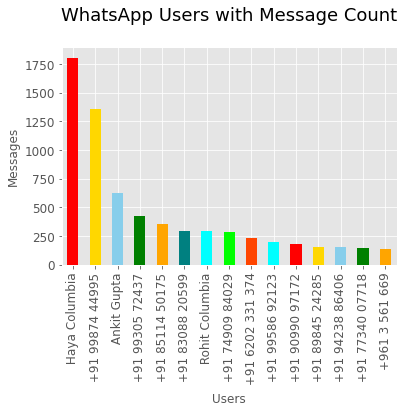

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
 
users=df.groupby('User')['User'].count().nlargest(15)
 
def bar_chart(users):
    ax = users.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("WhatsApp Users with Message Count\n", fontsize=18)
    ax.set_xlabel("Users", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.show()
    #plt.savefig('whatsapp.png')
 
bar_chart(users)

## Date and User chat Bar Chart

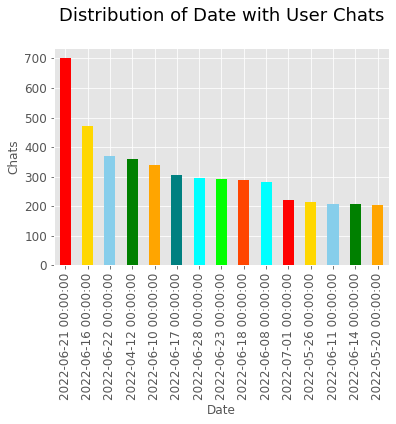

In [62]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

days=df.groupby('Date')['Date'].count().nlargest(15)
def date_users_bar_chart(date):
    ax = date.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

days_count=days[0:]
date_users_bar_chart(days_count)

## Date with User Chat Line Graph

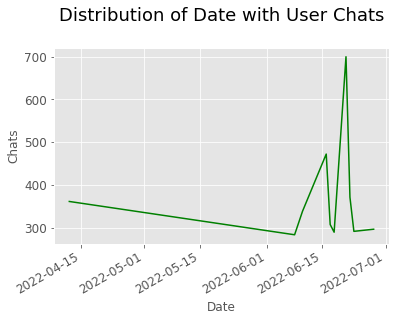

In [63]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

date=df.groupby('Date')['Date'].count().nlargest(10)
def user_line_chart(date):
    ax = date.plot(kind='line',color='green', fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

user_line_chart(date)

## User Chats Pie Chart

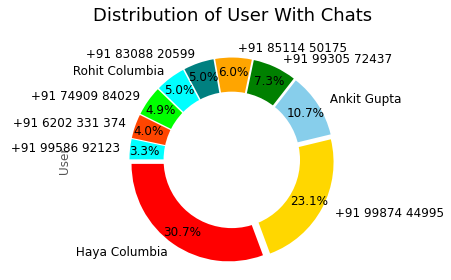

In [64]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=df.groupby('User')['User'].count().nlargest(10)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)

In [65]:
year_month=df.groupby(['Month','Day','Hour'])['Message'].count()
print(year_month)

Month  Day  Hour
1      1    16       1
3      28   14      29
            15      32
            16       4
            17       4
                    ..
7      2    21       9
            23       2
       3    18       4
            19      69
9      20   21       1
Name: Message, Length: 1005, dtype: int64


In [66]:
def clean(text):
    # replace any non-letters with a space
    text = re.sub('[^A-Za-z]+', ' ', text)
    # lower case the text
    text = text.lower()
    return text

# apply the function clean to each review
df['Cleaned_Message'] = df['Message'].apply(clean)
df.head(2)

Date                Time                User  \
1 2022-03-28 2022-10-10 14:22:31   ‪+91 82798 03383‬   
2 2022-03-28 2022-10-10 14:33:45       Haya Columbia   

                                             Message  Year  Month  Day  Hour  \
1  Hi guys, can you just paste here link of any r...  2022      3   28    14   
2                  So many groups lol. Hard to track  2022      3   28    14   

                                               Words  Word Length  \
1  [Hi, guys,, can, you, just, paste, here, link,...           16   
2          [So, many, groups, lol., Hard, to, track]            7   

   Message Characters                                    Cleaned_Message  
1                  84  hi guys can you just paste here link of any re...  
2                  33                   so many groups lol hard to track

In [100]:
ps = PorterStemmer() 

def token_stop_stem(text):
    tokens = word_tokenize(text) # tokenize the text
    newlist = []
    new_review = ""
    for word in tokens:
        if word not in set(stopwords.words('english')): # remove stop words
          word_stem = ps.stem(word) # stem each word
          newlist.append(word_stem)
          new_review = new_review + " " + word_stem
    return new_review

df['Cleaned_Message'] = df['Cleaned_Message'].apply(token_stop_stem)
df.head(2)

Date                Time                User  \
1 2022-03-28 2022-10-10 14:22:31   ‪+91 82798 03383‬   
2 2022-03-28 2022-10-10 14:33:45       Haya Columbia   

                                         Message  Year  Month  Day  Hour  \
1   hi guy , past link region specif group creat  2022      3   28    14   
2                 so mani group lol . hard track  2022      3   28    14   

                                               Words  Word Length  \
1  [Hi, guys,, can, you, just, paste, here, link,...           16   
2          [So, many, groups, lol., Hard, to, track]            7   

   Message Characters                              Cleaned_Message     Score  \
1                  84   hi guy past link region specif group creat -0.250000   
2                  33                    mani group lol hard track  0.254167   

   Polarity                                           LDA_Mess  
1  Negative  [hi, guy, ,, past, link, region, specif, group...  
2  Positive                 [mani, group, lol, ., hard, track]

In [101]:
def getPolarityScore(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def getPolarity(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Score'] = df['Cleaned_Message'].apply(getPolarityScore) 
df['Polarity'] = df['Score'].apply(getPolarity)
df.head()

Date                Time                  User  \
1 2022-03-28 2022-10-10 14:22:31     ‪+91 82798 03383‬   
2 2022-03-28 2022-10-10 14:33:45         Haya Columbia   
3 2022-03-28 2022-10-10 14:34:11     ‪+91 99586 92123‬   
4 2022-03-28 2022-10-10 14:35:16         Haya Columbia   
5 2022-03-28 2022-10-10 14:35:30   ‪+91 91 6442 684 6‬   

                                             Message  Year  Month  Day  Hour  \
1       hi guy , past link region specif group creat  2022      3   28    14   
2                     so mani group lol . hard track  2022      3   28    14   
3                                                  😂  2022      3   28    14   
4   if everyon end nyc though , one fun diwali pa...  2022      3   28    14   
5                                 i pop question ! !  2022      3   28    14   

                                               Words  Word Length  \
1  [Hi, guys,, can, you, just, paste, here, link,...           16   
2          [So, many, groups, lol., Hard, to, track]            7   
3                                                [😂]            1   
4  [If, everyone, in, this, ends, up, at, nyc, th...           17   
5   [I, was, about, to, pop, up, that, question, !!]            9   

   Message Characters                               Cleaned_Message     Score  \
1                  84    hi guy past link region specif group creat -0.250000   
2                  33                     mani group lol hard track  0.254167   
3                   1                                                0.000000   
4                  79   everyon end nyc though one fun diwali parti  0.300000   
5                  38                                  pop question  0.000000   

   Polarity                                           LDA_Mess  
1  Negative  [hi, guy, ,, past, link, region, specif, group...  
2  Positive                 [mani, group, lol, ., hard, track]  
3   Neutral                                                [😂]  
4  Positive  [everyon, end, nyc, though, ,, one, fun, diwal...  
5   Neutral                              [pop, question, !, !]

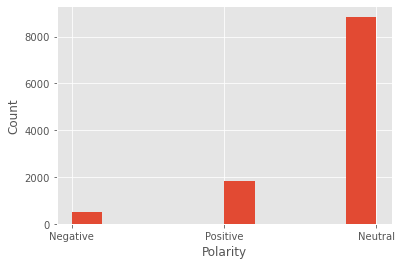

In [102]:
plt.hist(df['Polarity'])
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show() 

In [103]:
def token_stop(text):
    tokens = word_tokenize(text) # tokenize the text
    newlist = []
    for word in tokens:
        if word not in set(stopwords.words('english')): # remove stop words
          newlist.append(word)
    return newlist

df['LDA_Mess'] = df['Cleaned_Message'].apply(token_stop)
df.head(2)

Date                Time                User  \
1 2022-03-28 2022-10-10 14:22:31   ‪+91 82798 03383‬   
2 2022-03-28 2022-10-10 14:33:45       Haya Columbia   

                                         Message  Year  Month  Day  Hour  \
1   hi guy , past link region specif group creat  2022      3   28    14   
2                 so mani group lol . hard track  2022      3   28    14   

                                               Words  Word Length  \
1  [Hi, guys,, can, you, just, paste, here, link,...           16   
2          [So, many, groups, lol., Hard, to, track]            7   

   Message Characters                              Cleaned_Message     Score  \
1                  84   hi guy past link region specif group creat -0.250000   
2                  33                    mani group lol hard track  0.254167   

   Polarity                                           LDA_Mess  
1  Negative  [hi, guy, past, link, region, specif, group, c...  
2  Positive                    [mani, group, lol, hard, track]

In [104]:
dict_ = corpora.Dictionary(df['LDA_Mess']) #convert into unique tokens of all words in LDA reviews
print(dict_)

Dictionary(4415 unique tokens: ['creat', 'group', 'guy', 'hi', 'link']...)


In [105]:
doc_term_matrix = [dict_.doc2bow(i) for i in df['LDA_Mess']] 
print(doc_term_matrix)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(1, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1)], [(22, 1)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(34, 1), (35, 1), (36, 1)], [(37, 1), (38, 1)], [(2, 1), (3, 1), (30, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)], [(44, 1), (45, 1)], [(39, 1), (46, 1)], [], [(46, 1), (47, 1), (48, 1)], [], [], [], [], [(1, 1), (46, 1), (49, 1), (50, 1), (51, 1)], [(52, 1)], [(53, 1)], [(46, 1), (48, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(1, 1), (4, 1), (54, 1), (55, 1), (57, 1), (58, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1)], [(1, 1), (17, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(69, 1), (70, 1)], [(72, 1), (73, 1)], [(1, 1), (4, 1), (50, 1), (74, 1), (75, 1)], [(76, 1), (77, 1), (78, 1), (79, 1)], [(1, 1), (4, 1

In [75]:
# set training parameters
num_topics = 20
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model = lda(doc_term_matrix,
    num_topics=num_topics,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

In [76]:
lda_model.print_topics(num_words=10)

[(0,
  '0.137*"😂" + 0.092*"work" + 0.060*"sure" + 0.045*"thing" + 0.044*"yepp" + 0.039*"bank" + 0.032*"interest" + 0.031*"\'m" + 0.029*"pdl" + 0.028*"might"'),
 (1,
  '0.073*"guy" + 0.062*"," + 0.060*"say" + 0.045*"would" + 0.045*"hey" + 0.034*"na" + 0.033*"+1" + 0.024*"free" + 0.024*"withdraw" + 0.022*"best"'),
 (2,
  '0.071*"ask" + 0.049*"lol" + 0.047*"everyon" + 0.046*"passport" + 0.032*"email" + 0.032*"come" + 0.032*"pay" + 0.027*"taken" + 0.025*"address" + 0.025*"mail"'),
 (3,
  '0.074*"@" + 0.066*"card" + 0.055*"credit" + 0.043*"apart" + 0.036*"lot" + 0.031*"nyc" + 0.029*"👀" + 0.026*"..." + 0.026*"add" + 0.026*"3"'),
 (4,
  '0.078*"?" + 0.069*"," + 0.063*"need" + 0.041*"show" + 0.037*"i20" + 0.032*"mention" + 0.032*"fee" + 0.032*"yep" + 0.023*"differ" + 0.020*"amount"'),
 (5,
  '0.069*"``" + 0.044*"dont" + 0.042*"u" + 0.039*"peopl" + 0.028*"get" + 0.027*"travel" + 0.027*"good" + 0.026*"want" + 0.024*"new" + 0.022*"session"'),
 (6,
  '0.184*"omit" + 0.120*"\u200eimag" + 0.041*"acc

In [78]:
# from gensim.corpora import Dictionary

# texts = [['human', 'interface', 'computer','interface']]
# dct = Dictionary(texts)  # initialize a Dictionary
# print(dct)
# print(type(dct))
# dct.add_documents([["cat", "say", "meow"], ["dog"]])  # add more document (extend the vocabulary)
# dct.doc2bow(["dog", "computer", "interface","interface"])

Dictionary(3 unique tokens: ['computer', 'human', 'interface'])
<class 'gensim.corpora.dictionary.Dictionary'>


[(0, 1), (2, 2), (6, 1)]

In [79]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['LDA_Mess'], dictionary=dict_, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4441283222405312


In [80]:
def compute_coherence_values(dictionary, k):
    num_topics = k
    chunksize = 1000
    passes = 20
    iterations = 400
    eval_every = None

    lda = gensim.models.LdaModel

    lda_model = lda(doc_term_matrix,
        num_topics=num_topics,
        id2word = dictionary,
        iterations=iterations,
        passes=passes,
        eval_every=eval_every,
        random_state=9651
    )
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['LDA_Mess'], dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [90]:
res = []
topics = []
min_topics = 40
max_topics = 100
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
for i in topics_range:
    res.append(compute_coherence_values(dict_,i))
    topics.append(i)

In [91]:
print(res)

[0.49690519758085727, 0.48841185400674175, 0.5137865904292359, 0.47975504357793636, 0.4832956883914647, 0.4848469911332043, 0.4930528645616463, 0.4799552418113044, 0.5094738008985134, 0.521940041541649, 0.4759532799625201, 0.4838808269287029, 0.5031838397638903, 0.5077244416578128, 0.4974719465460848, 0.48019319737994587, 0.5092465677730277, 0.4749306051009556, 0.4935538661161316, 0.5037838219382643, 0.48982403836417343, 0.4840898420866834, 0.47201653628135354, 0.482024639964062, 0.47414642337241464, 0.4787095703358504, 0.4611909716278872, 0.46150184399353766, 0.4525197779637292, 0.4611602746762532, 0.4497033762165338, 0.47853467258806737, 0.46764911777801, 0.45674511620525715, 0.4735290001431286, 0.4728236730644545, 0.4739408493148937, 0.46664592465201715, 0.4718882396486352, 0.43611816030196043, 0.447702870415816, 0.46739064841018135, 0.4571433224266295, 0.46094579363517196, 0.46177152152699785, 0.46516182314464527, 0.4545805767893643, 0.45943829232102806, 0.44330729193683854, 0.4406

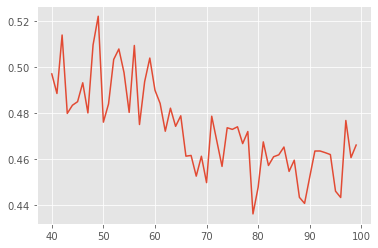

In [92]:
plt.plot(topics,res)

In [106]:
lda_model = lda(doc_term_matrix,
    num_topics=50,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

In [107]:
lda_model.print_topics(num_words=10)

[(10,
  '0.393*"one" + 0.073*"mean" + 0.054*"someth" + 0.043*"point" + 0.039*"miss" + 0.037*"multipl" + 0.036*"btw" + 0.027*"data" + 0.025*"drop" + 0.023*"major"'),
 (32,
  '0.179*"month" + 0.111*"guess" + 0.092*"upload" + 0.067*"less" + 0.057*"estim" + 0.052*"record" + 0.043*"state" + 0.042*"prefer" + 0.040*"either" + 0.038*"food"'),
 (45,
  '0.252*"yeah" + 0.156*"know" + 0.113*"hey" + 0.108*"get" + 0.062*"uni" + 0.050*"option" + 0.042*"dropbox" + 0.039*"without" + 0.039*"yup" + 0.018*"soon"'),
 (12,
  '0.214*"use" + 0.103*"submit" + 0.102*"new" + 0.092*"travel" + 0.082*"fine" + 0.071*"best" + 0.028*"get" + 0.022*"york" + 0.021*"log" + 0.017*"peac"'),
 (40,
  '0.130*"someon" + 0.123*"card" + 0.104*"credit" + 0.082*"share" + 0.077*"cool" + 0.072*"pleas" + 0.068*"done" + 0.038*"doubt" + 0.028*"link" + 0.025*"hold"'),
 (4,
  '0.227*"would" + 0.155*"question" + 0.111*"find" + 0.078*"stuff" + 0.075*"read" + 0.046*"respons" + 0.041*"second" + 0.037*"follow" + 0.029*"roommat" + 0.020*"relat"

In [97]:
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=a3950fd61b42c0d3b3d75dd0501de296a82bce5719983c5733deeed1e12c80b8
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=36d935edf9fc6a271c8a37ba3704e0ea883e784403a3e8ec6d1727f35bda0816
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully b

In [108]:

import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dict_)
LDAvis_prepared

C:\Users\Dell\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
24     0.110071 -0.011248       1        1  3.223749
45     0.181150 -0.041708       2        1  2.737269
11     0.066763  0.034723       3        1  2.605357
31    -0.160893 -0.219316       4        1  2.595321
38     0.126397 -0.056768       5        1  2.483044
8     -0.062230  0.072067       6        1  2.425066
46     0.051372  0.014504       7        1  2.389980
15    -0.045833  0.061672       8        1  2.373602
41    -0.042616  0.073499       9        1  2.331279
39    -0.064715  0.067201      10        1  2.298729
25     0.116701 -0.063501      11        1  2.292027
5      0.124926 -0.097755      12        1  2.230261
10    -0.062984  0.052693      13        1  2.180834
37    -0.063076  0.060537      14        1  2.157905
40    -0.006325 -0.001212      15        1  2.153323
42    -0.082409  0.093177      16        1  2.152976
20    -0.072018  0.040641      17        1  2.136527
19     0.059343 -0.009860      18        1  2.133759
6     -0.061354  0.053024      19        1  2.119256
3     -0.061173  0.052577      20        1  2.037296
48    -0.050537  0.047514      21        1  2.031941
21     0.028645  0.020303      22        1  2.021337
27     0.029597  0.012518      23        1  2.019891
47    -0.061129  0.051660      24        1  1.998901
36    -0.089603 -0.048629      25        1  1.997354
12     0.091466 -0.015199      26        1  1.960704
1      0.020321  0.026263      27        1  1.953915
13    -0.158694 -0.226672      28        1  1.953567
49     0.088360 -0.009472      29        1  1.952192
22     0.082389 -0.065504      30        1  1.943633
43     0.038846  0.005438      31        1  1.931771
44    -0.062096  0.052278      32        1  1.900769
33    -0.161873 -0.242716      33        1  1.868255
9     -0.080008  0.072787      34        1  1.865991
30     0.052029  0.009901      35        1  1.846498
35    -0.050412  0.036104      36        1  1.813706
26    -0.045745  0.048152      37        1  1.718528
14    -0.062029  0.029004      38        1  1.693785
0     -0.057035  0.044268      39        1  1.649059
18    -0.057408  0.039493      40        1  1.633456
17     0.073817 -0.004862      41        1  1.630355
4     -0.058302  0.040894      42        1  1.628534
34     0.103381 -0.053672      43        1  1.623143
32     0.013768  0.010520      44        1  1.606826
23     0.059657 -0.008908      45        1  1.587604
2      0.018300  0.010894      46        1  1.587456
7      0.059176 -0.026787      47        1  1.504989
16     0.071527 -0.009935      48        1  1.418744
29     0.042138 -0.002963      49        1  1.312062
28     0.070357 -0.017621      50        1  1.287477, topic_info=       Term        Freq       Total Category  logprob  loglift
73    thank  396.000000  396.000000  Default  30.0000  30.0000
155    omit  376.000000  376.000000  Default  29.0000  29.0000
17      one  374.000000  374.000000  Default  28.0000  28.0000
34     like  328.000000  328.000000  Default  27.0000  27.0000
39    anyon  358.000000  358.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
2       guy    0.024238  326.515200  Topic50 -10.0487  -5.1558
3        hi    0.024238   64.828186  Topic50 -10.0487  -3.5391
4      link    0.024238  124.830594  Topic50 -10.0487  -4.1943
5      past    0.024238   12.781499  Topic50 -10.0487  -1.9154
6    region    0.024238    4.927066  Topic50 -10.0487  -0.9621

[1773 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
729      46  0.698366       aa
247       1  0.987654      abl
1514     15  0.889811  absolut
478       8  0.905878   academ
68       39  0.988108   accept
...     ...       ...      ...
312      26  0.956689     york
856      17  0.404504   youtub
1058     50  0.866125       yr
52        2  0.973365      yup
843      26  0.590734     zyxb

[13